# Summary of Data

In [7]:
import wavio
import scipy.fftpack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed, Bidirectional
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Activation, Input
from keras.layers.advanced_activations import LeakyReLU
%matplotlib inline



plt.style.use('bmh')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.facecolor'] = 'white'



Using TensorFlow backend.


In [8]:
df = pd.read_table("/home/asura/Downloads/acoustic_modelling/TUT-acoustic-scenes-2016-development.meta/TUT-acoustic-scenes-2016-development/meta.csv")

In [9]:
df

,name,class
0,audio/a001_0_30.wav,residential_area
1,audio/a001_120_150.wav,residential_area
2,audio/a001_150_180.wav,residential_area
3,audio/a001_30_60.wav,residential_area
4,audio/a001_60_90.wav,residential_area
5,audio/a001_90_120.wav,residential_area
6,audio/a003_0_30.wav,residential_area
7,audio/a003_120_150.wav,residential_area
8,audio/a003_150_180.wav,residential_area
9,audio/a003_180_210.wav,residential_area


## Reading the Sound File

In [18]:
signal = wavio.read("TUT-acoustic-scenes-2016-development.audio.1/TUT-acoustic-scenes-2016-development/audio/a001_90_120.wav")

### Sound Signal Parameters

In [19]:
(n_samples, n_channels) =  signal.data.shape
rate = signal.rate
sampwidth = signal.sampwidth

print """The parameters for the sound signals are:
\n\tNumber of Samples: %d\n\tChannels: %d\n\tSampling Frequency %d\n\tSampling Width: %d """ % (n_samples, n_channels, rate, sampwidth)

The parameters for the sound signals are:

	Number of Samples: 1323001
	Channels: 2
	Sampling Frequency 44100
	Sampling Width: 3 


## Plots of the Tone

/home/asura/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


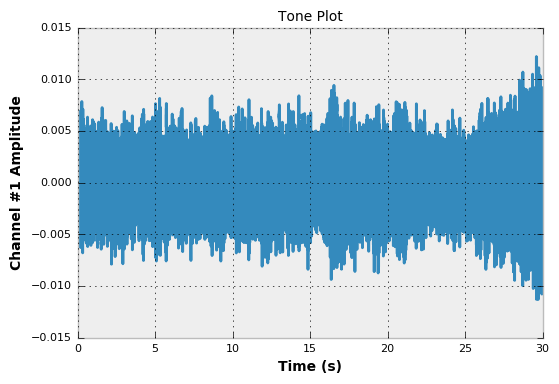

In [5]:
data = signal.data/((2.** 23) -1)
time = np.arange(0, n_samples, 1).astype('float')/rate
plt.plot(time, data[:,0])
plt.xlabel('Time (s)')
plt.ylabel('Channel #1 Amplitude')
plt.title('Tone Plot')


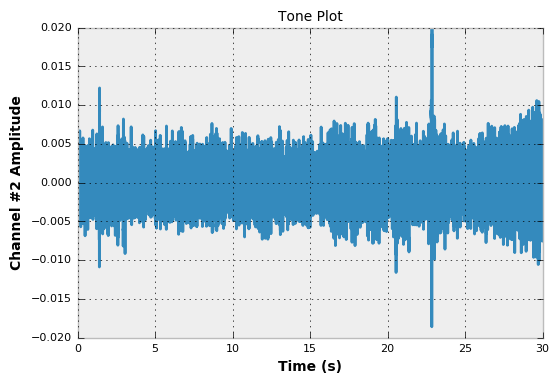

In [6]:
plt.plot(time, data[:,1])
plt.xlabel('Time (s)')
plt.ylabel('Channel #2 Amplitude')
plt.title('Tone Plot')

## Frequency Spectrum of the Signals

In [ ]:
F1 = scipy.fftpack.fft(data[0:-2, 0])
nUniquePts = int(np.ceil((n_samples+1)/2.0))
F1 = np.abs(F1[0:nUniquePts])
freqArray = np.arange(0, nUniquePts, 1.0) * (rate / n_samples);

plt.plot(freqArray, F1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Signal (Channel #1)')

In [ ]:
F2 = scipy.fftpack.fft(data[0:-2, 1])
nUniquePts = int(ceil((n_samples+1)/2.0))
F2 = np.abs(F2[0:nUniquePts])
freqArray = np.arange(0, nUniquePts, 1.0) * (rate / n_samples);

plt.plot(freqArray, F2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Signal (Channel #2)')

# Creating Window Sequence from Signal

In [15]:
def sliding_window(signal, length, stride):
    (n_samples, n_channels) = signal.shape
    result = []
    
    for t in range(n_samples):
        step = stride*t
        try:
            window = signal[step: step +length, :]
            result.append(window)
        except IndexError:
            if step < n_samples:
                pad_length = n_samples - step
                pad = np.zeros((int(pad_length), n_channels))
                window = np.concatenate((signal[step:-1, :], pad), axis=0)
                result.append(window)
            break
    result = np.dstack(result)
    return result
                
    

def create_time_windows(signal, sampling_freq, time_window):
    """
    INPUTS:  signal -> np.array of size (n_samples, n_channels) containing interesting sequence
             sampling_freq -> np.int that is Frequency used for sampling the signal in (samples/s or Hz)
             time_window -> np.int that is the time length in seconds of the signal windows
    """          
    (n_samples, n_channels) = signal.shape
    window_size = round(sampling_freq*time_window)
    num_windows = round((n_samples/window_size))
    pad_size = n_samples - num_windows*window_size
    difference = abs(window_size - pad_size)
    if difference < 100:
        padding = np.zeros((int(pad_size), n_channels))
        signal = np.concatenate((signal, padding), axis=0)
        return np.dstack(np.array_split(signal, int(num_windows)))
    else:
        signal = signal[0:n_samples-int(pad_size),:]
        return np.dstack(np.array_split(signal, int(num_windows)))
    
def windowize(df, sampling_freq=44100, time_window=3):
    result = []
    i=0
    for index, row in df.iterrows():
        
        #filename = row['name'].split('/')
        signal = wavio.read(row['name'])
        sig = create_time_windows(signal.data, sampling_freq, time_window)
        #sig = sliding_window(signal.data, 10000, 2000)
        result.append(sig)
        i +=1
        if i > 10:
            break
        
    result = np.stack(result, axis=3)    
    result = np.swapaxes(result, 0, 3)
    result = np.swapaxes(result, 1, 2)
    result = np.swapaxes(result, 3, 2)
    
    return result

# Making CRNN Model

In [24]:
def build_model(batch_size=30, windows=10, timesteps=120000, features=2):
    
    model = Sequential([
        TimeDistributed(Bidirectional(LSTM(200, return_sequences=False, stateful=True), merge_mode='sum'), batch_input_shape=(batch_size, windows, timesteps, features)),
        LSTM(300, return_sequences=False, stateful=True),
        Dense(100, kernel_initializer='glorot_uniform'),
        LeakyReLU(alpha=0.01),
        Dense(15, kernel_initializer='glorot_uniform'),
        Activation('softmax')
    ])
    
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [179]:
x = windowize(df, rate, 3)
le = LabelEncoder()
le.fit(np.squeeze([df['class']]))
labels_num = le.transform(np.squeeze([df['class']]))
cat_labels = to_categorical(labels_num, num_classes=15)

In [23]:
x = windowize(df, rate, 3)
(n_samples, windows, timesteps, features) = x.shape
model = build_model(10, windows, timesteps, features)
model.summary()

/home/asura/py2env/lib/python2.7/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="glorot_uniform")`
  '` call to the Keras 2 API: ' + signature)
/home/asura/py2env/lib/python2.7/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, kernel_initializer="glorot_uniform")`
  '` call to the Keras 2 API: ' + signature)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (10, 10, 200)             324800    
_________________________________________________________________
lstm_2 (LSTM)                (10, 300)                 601200    
_________________________________________________________________
dense_1 (Dense)              (10, 100)                 30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (10, 100)                 0         
_________________________________________________________________
dense_2 (Dense)              (10, 15)                  1515      
_________________________________________________________________
activation_1 (Activation)    (10, 15)                  0         
Total params: 957,615.0
Trainable params: 957,615.0
Non-trainable params: 0.0
________________________________________________________________